In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

In [2]:
#Reading ht csv file
df =pd.read_csv("C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\Data_Analytics\Analytics.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,0.816895,0,1,1,2,1,0.928786,0.631290,1,1
1,51676,0,0.743652,0,0,1,3,0,0.787090,0.427261,2,1
2,31112,1,0.975586,0,1,1,2,0,0.271835,0.532876,2,1
3,60182,0,0.597168,0,0,1,2,1,0.621313,0.578483,3,1
4,1665,0,0.963379,1,0,1,3,0,0.636778,0.328847,2,1


# Selecting Important Features

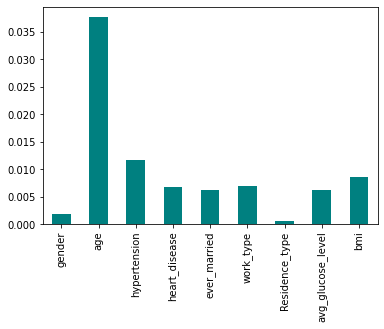

In [3]:
from sklearn.feature_selection import mutual_info_classif

X=df.iloc[:,1:len(df.columns)-2]
y=df['stroke']

importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances,df.columns[1:len(df.columns)-2])
feat_imp.plot(kind='bar',color='teal')
plt.show()

In [4]:
# from sklearn import tree
# from matplotlib import pyplot as plt

# feature_names = X.columns

# fig = plt.figure(figsize = (25,10))
# _ = tree.plot_tree(df, feature_names = feature_names, class_names = {0:'No stroke',1:'Stroke'},filled=True,fontsize =12)

# MODEL LOGISTIC REGRESSION

In [5]:
X_LR = df.iloc[:,2:8]
#print(X_LR)

Y_LR = df['stroke']
#print(Y_LR)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, Y_LR, test_size=0.3,random_state=42)

# print(len(y_train_LR))
# print(len(x_train_LR))

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state=0)  
classifier.fit(x_train_LR, y_train_LR)

#PREDICTING THE TEST RESULT  
y_pred_LR = classifier.predict(x_test_LR)
#print(y_pred_LR)


#CREATING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix  
cmatrix = confusion_matrix(y_test_LR,y_pred_LR)  

print(cmatrix)

#Precision
from sklearn.metrics import classification_report
print(classification_report(y_test_LR,y_pred_LR))


[[1444    0]
 [  89    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

# DECISION TREE CLASSIFICATION

In [6]:
# X = df.drop(['Residence_type','ever_married','stroke'],axis=1)
X_dt = df.drop(['id','gender','ever_married','Residence_type','stroke'],axis=1)
print(X_dt)

Y_dt = df['stroke']
print(Y_dt)

           age  hypertension  heart_disease  work_type  avg_glucose_level  \
0     0.816895             0              1          2           0.928786   
1     0.743652             0              0          3           0.787090   
2     0.975586             0              1          2           0.271835   
3     0.597168             0              0          2           0.621313   
4     0.963379             1              0          3           0.636778   
...        ...           ...            ...        ...                ...   
5105  0.975586             1              0          2           0.153201   
5106  0.987793             0              0          3           0.375003   
5107  0.426270             0              0          3           0.149134   
5108  0.621582             0              0          2           0.594879   
5109  0.536133             0              0          0           0.161388   

           bmi  smoking_status  
0     0.631290               1  
1     0.4

# TRAIN TEST SPLIT

In [7]:
from sklearn.model_selection import train_test_split

x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.3,random_state=0)
print(len(x_train_dt))
print(len(x_test_dt))
x_train_dt

3577
1533


,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
1921,0.536133,0,0,2,0.215862,0.506472,3
4074,0.853516,0,0,0,0.552284,0.556879,2
2311,0.013184,0,0,4,0.052922,0.160823,0
3080,0.902344,0,0,2,0.152292,0.189627,2
1620,0.804688,0,0,0,0.162673,0.472867,2
...,...,...,...,...,...,...,...
4931,0.645996,1,0,0,0.232718,0.684098,3
3264,0.743652,0,0,2,0.090380,0.376854,1
1653,0.536133,0,0,2,0.211849,0.434462,3
2607,0.255371,0,0,2,0.352208,0.465666,1


# VALIDATION DATA

In [8]:
x_train_new_dt, x_val_dt, y_train_new_dt, y_val_dt = train_test_split(x_train_dt, y_train_dt, test_size=0.3,random_state=0)
print(len(x_train_new_dt))
print(len(x_val_dt))
print(len(x_test_dt))

2503
1074
1533


In [9]:
x_val_dt

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
1183,0.890137,1,0,3,0.251179,0.427261,0
4019,0.157715,0,0,4,0.020013,0.158423,2
281,0.707031,1,0,2,0.003532,0.412859,3
4678,0.804688,0,0,3,0.105737,0.535276,2
152,0.975586,0,0,3,0.114781,0.571282,2
...,...,...,...,...,...,...,...
3414,0.157715,0,0,2,0.460032,0.328847,0
2095,0.829102,0,0,2,0.229240,0.504072,2
2511,0.340820,0,0,2,0.325880,0.631290,1
2073,0.145508,0,0,4,0.016160,0.264038,2


# TRAINING

In [10]:
from sklearn.tree import DecisionTreeClassifier  
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=0)  
DT_model.fit(x_train_dt, y_train_dt)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

# TESTING

In [11]:
#Predicting the test set result  
y_pred_dt= DT_model.predict(x_val_dt)
print(len(y_pred_dt))
print(len(y_val_dt))
print(len(y_test_dt))

1074
1074
1533


# CREATING CONFUSION MATRIX

In [12]:
from sklearn.metrics import confusion_matrix,f1_score  
cmatrix = confusion_matrix(y_val_dt,y_pred_dt)
print(cmatrix)
f1_score = (y_val_dt,y_pred_dt)

[[1019    0]
 [   0   55]]


In [13]:
from sklearn.metrics import accuracy_score 
score1 = accuracy_score(y_val_dt,y_pred_dt)
print(score1)

1.0


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_val_dt,y_pred_dt,target_names = ['No stroke','Stroke']))

              precision    recall  f1-score   support

   No stroke       1.00      1.00      1.00      1019
      Stroke       1.00      1.00      1.00        55

    accuracy                           1.00      1074
   macro avg       1.00      1.00      1.00      1074
weighted avg       1.00      1.00      1.00      1074



# Hyperparameters Tuning

In [15]:
param_list = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [16]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DT_model, param_grid=param_list, cv=10)

In [17]:
grid.fit(x_train_dt, y_train_dt)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [18]:
#Best score obtained from hyperparameter tuning
grid.best_score_

0.9516360734237829

In [19]:
#Best parameter obtained from hyperparameter tuning
grid.best_params_['criterion']

'gini'

# PICKLE FILE CREATION

In [20]:
import pickle

with open('tuned_model.pkl','wb') as files:
    pickle.dump(grid,files)


In [21]:
pickled_model = pickle.load(open('tuned_model.pkl','rb'))
pred = pickled_model.predict(x_test_dt)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
score = pickled_model.score(x_test_dt,y_test_dt)
print(score)

0.9504240052185258


# VALIDATION SET ALONG WITH PREDICTED VALUES


In [23]:
# prediction = grid.predict(x_val_dt)
# prediction
